In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%matplotlib inline

import requests
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays

In [24]:
for date, name in sorted(holidays.IND(state='TN', years=2018).items()):
  print(date, name)

2018-01-14 Pongal
2018-01-15 Thiruvalluvar Day / Mattu Pongal
2018-01-16 Uzhavar Thirunal
2018-01-26 Republic Day
2018-02-13 Maha Shivaratri
2018-03-29 Mahavir Jayanti
2018-03-30 Good Friday
2018-04-14 Dr. B. R. Ambedkar's Jayanti; Puthandu (Tamil New Year)
2018-04-30 Buddha Purnima
2018-06-16 Eid al-Fitr
2018-08-15 Independence Day
2018-08-22 Eid al-Adha
2018-09-03 Janmashtami
2018-09-21 Ashura
2018-10-02 Gandhi Jayanti
2018-10-19 Dussehra
2018-11-07 Diwali
2018-11-21 Prophet's Birthday
2018-11-23 Guru Nanak Jayanti
2018-12-25 Christmas


In [25]:
dailyEnergy = pd.read_excel('/content/drive/MyDrive/dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TimeReviewed                 505 non-null    datetime64[ns]
 1   Solar_Power_Consumption(Kw)  505 non-null    float64       
 2   Temp( C)                     505 non-null    float64       
 3   EmployeeCount                505 non-null    int64         
 4   weekday                      505 non-null    int32         
 5   day_type                     505 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 21.8 KB


<ipython-input-25-f7488c11e4aa>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-

**LINEAR REGRESSION**

In [26]:
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]



In [27]:
from sklearn.linear_model import LinearRegression
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print ("The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test))


The test score R2:  0.6370849327485767


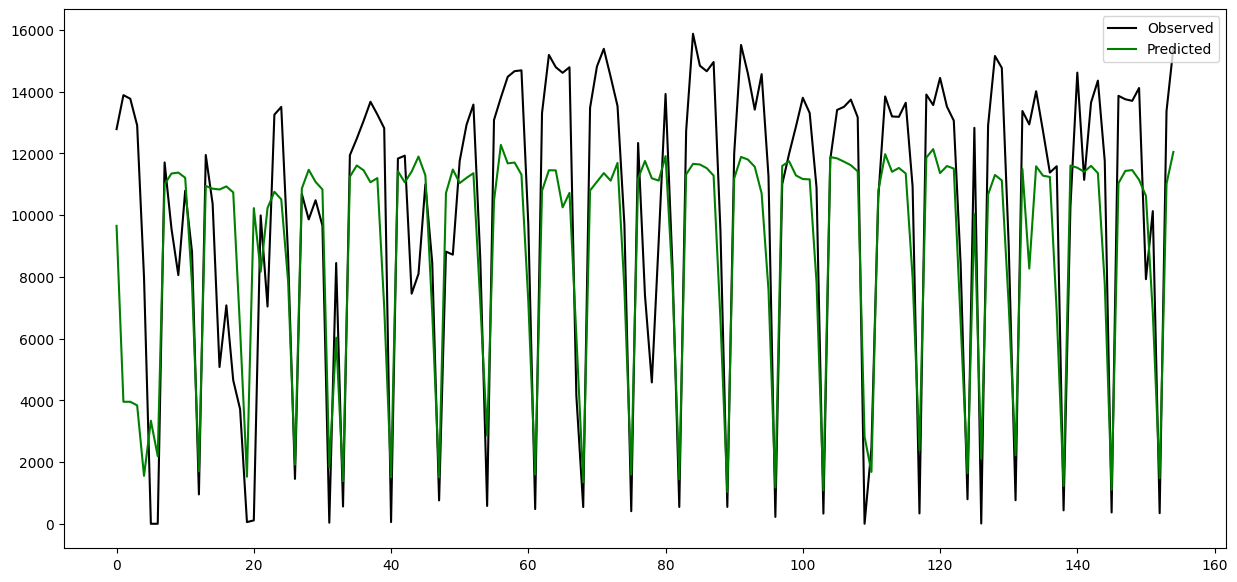

In [28]:
fig = plt.figure(figsize=(15,7))
plt.plot(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

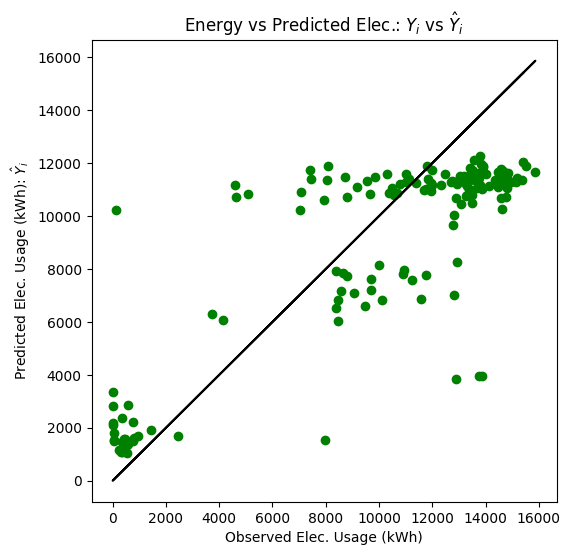

In [29]:
fig = plt.figure(figsize=(6,6))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

**USING LSTM**

In [30]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [31]:
import pandas as pd
import numpy as np
from datetime import datetime

energy=pd.read_excel('/content/drive/MyDrive/dailyEnergyWithFeatures.xlsx')
# save to file

energy['weekday'] = energy['TimeReviewed'].dt.dayofweek
energy['day_type'] = np.zeros(len(energy))
energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1

energy.to_excel('/content/drive/MyDrive/energy.xlsx')
energy

<ipython-input-31-083b27461079>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeRevie

,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,2017-12-26,12782.411988,25.000000,121,1,1.0
1,2017-12-27,13883.010020,25.375000,0,2,0.0
2,2017-12-28,13766.083029,24.833333,0,3,0.0
3,2017-12-29,12904.092990,24.833333,0,4,0.0
4,2017-12-30,7985.972000,25.906250,0,5,1.0
...,...,...,...,...,...,...
500,2019-05-10,15619.215017,27.041667,184,4,0.0
501,2019-05-11,9179.519970,26.662921,166,5,1.0
502,2019-05-12,0.000000,29.000000,11,6,1.0
503,2019-05-13,12396.665989,27.169492,186,0,0.0


In [32]:
from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = pd.read_excel('/content/drive/MyDrive/energy.xlsx', header=0, index_col=0)
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971   
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
500,0.739638,0.304045,0.818966,0.500000,0.0,0.872778,0.336123,0.793103,0.666667,0.0
501,0.872778,0.336123,0.793103,0.666667,0.0,0.512937,0.285412,0.715517,0.833333,1.0
502,0.512937,0.285412,0.715517,0.833333,1.0,0.000000,0.598326,0.047414,1.000000,1.0
503,0.000000,0.598326,0.047414,1.000000,1.0,0.692707,0.353237,0.801724,0.000000,0.0


In [33]:

values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 9) (365,) (139, 1, 9) (139,)


In [34]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/20
6/6 - 1s - 241ms/step - accuracy: 0.6986 - loss: 0.2813 - val_accuracy: 0.6906 - val_loss: 0.2463
Epoch 2/20
6/6 - 0s - 14ms/step - accuracy: 0.6986 - loss: 0.2283 - val_accuracy: 0.6906 - val_loss: 0.2063
Epoch 3/20
6/6 - 0s - 12ms/step - accuracy: 0.6986 - loss: 0.1964 - val_accuracy: 0.6906 - val_loss: 0.1871
Epoch 4/20
6/6 - 0s - 24ms/step - accuracy: 0.6986 - loss: 0.1790 - val_accuracy: 0.7266 - val_loss: 0.1750
Epoch 5/20
6/6 - 0s - 12ms/step - accuracy: 0.7233 - loss: 0.1685 - val_accuracy: 0.8201 - val_loss: 0.1621
Epoch 6/20
6/6 - 0s - 11ms/step - accuracy: 0.8137 - loss: 0.1526 - val_accuracy: 0.8273 - val_loss: 0.1474
Epoch 7/20
6/6 - 0s - 12ms/step - accuracy: 0.8274 - loss: 0.1408 - val_accuracy: 0.8345 - val_loss: 0.1326
Epoch 8/20
6/6 - 0s - 12ms/step - accuracy: 0.8356 - loss: 0.1304 - val_accuracy: 0.8345 - val_loss: 0.1194
Epoch 9/20
6/6 - 0s - 12ms/step - accuracy: 0.8411 - loss: 0.1167 - val_accuracy: 0.8345 - val_loss: 0.1079
Epoch 10/20
6/6 - 0s - 12ms

In [36]:
score = model.evaluate(test_X, test_y, batch_size=70, verbose=1)

print('Test accuracy:', score[1])
print('Accuracy:',score[1]*100)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9665 - loss: 0.0652
Test accuracy: 0.971222996711731
Accuracy: 97.1222996711731


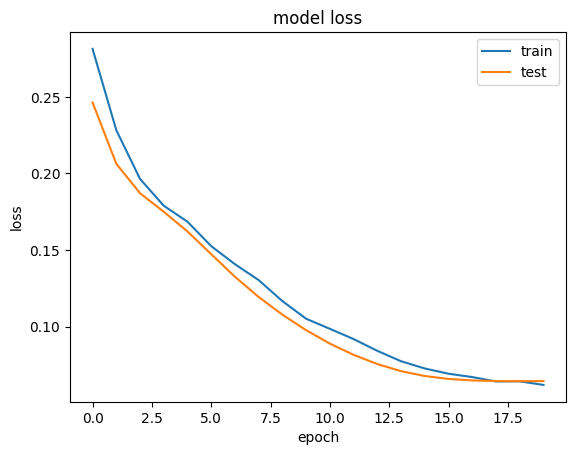

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [38]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test RMSE: 4546.487


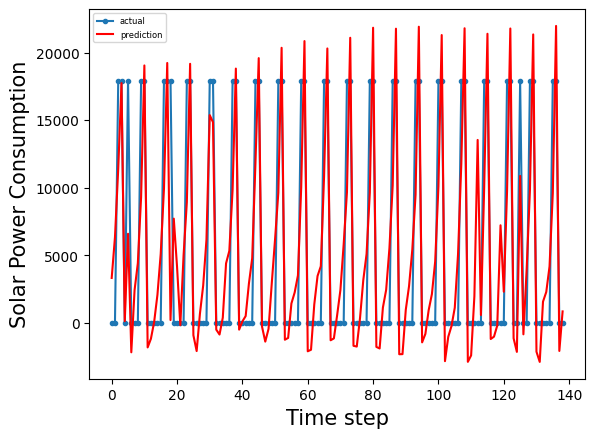

In [39]:
aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [70]:
n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")

Enter the day for which the value is to be predicted:85
The value of the consumption the next day will be 5512.462472446393 and the percentage change is  100.0 %
